In [296]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import approximate_taylor_polynomial

import math 
from decimal import Decimal as D
from decimal import getcontext

In [297]:
def configuracionEpPr(tolerancia):
    """Recibe una lista de tolerancias para definir la precision que se va a usar en el programa

    Args:
        tolerancia (List): Lista de tolerancias a utilizar
    """
    max = 0
    for tol in tolerancia:
        if int(abs(math.log10(tol))) > max:
            max = int(abs(math.log10(tol)))

    getcontext().prec = max + 1 + 50  # tolerancia + 50 decimales de precision extra

def cantiDecimales(tolerancia):
    """Recibe una lista de tolerancias para devolver la cantidad de decimales que se utilizará en el programa

    Args:
        tolerancia (List): Lista de tolerancias a utilizar
    """
    max = 0
    for tol in tolerancia:
        if int(abs(math.log10(tol))) > max:
            max = int(abs(math.log10(tol)))

    return max + 1 + 50  # tolerancia + 50 decimales de precision extra

def printNumTOL(numero, tolerancia, cantidadExtraDecimales=2):
    """Imprime correctamente el número, dada la tolerancia más cierta cantidad de decimales extra

    Args:
        numero (number): El número a mostrar
        tolerancia (number): La tolerancia del número ingresado
        cantidadExtraDecimales (int, optional): cantidad de decimales extra. Defaults to 2.
    """
    try:
        decimalesAObservar = int(abs(math.log10(tolerancia))) + 1 + cantidadExtraDecimales  # Mostrar 2 decimales más de la tolerancia
        cantiDecimales = "{:." + str(decimalesAObservar) + "f}"
        print(cantiDecimales.format(numero))
    except TypeError:
        if numero == 0:
            print(numero)

def numTOL(numero, tolerancia, cantidadExtraDecimales=2):
    """Retorna correctamente el número, dada la tolerancia más cierta cantidad de decimales extra

    Args:
        numero (number): El número a mostrar
        tolerancia (number): La tolerancia del número ingresado
        cantidadExtraDecimales (int, optional): cantidad de decimales extra. Defaults to 2.
    """
    try:
        decimalesAObservar = int(abs(math.log10(tolerancia))) + 1 + cantidadExtraDecimales  # Mostrar 2 decimales más de la tolerancia
        cantiDecimales = "{:." + str(decimalesAObservar) + "f}"
        return cantiDecimales.format(numero)
    except TypeError:
        if numero == 0:
            return numero

In [298]:
def ecuacion(x):
    return np.exp(x)

def a_fx(x):
    #return 1/(1-x)
    return (np.cos(x) ** 2) - (x ** 2)


def b_fx(x):
    #if -1 <= x <= 2:  # en [-1,2]
    return (x * np.sin(x)) - 1


def c_fx(x): 
    return (x**3) - ((2*x)**2) + ((4/3)*x) - (8/27)


def d_fx(x):
    return (68.1*9.81)/x*(1-math.e**(-(x*10)/(68.1))) - 40


def e_fx(x):
    return 1*(x**3) - (2*x) - 5  # = 0


def f_fx(x):
    return (np.exp(x) ** - x) - x

In [303]:
def taylor(funcion, valorX, x0, x1):
    x = np.linspace(x0, x1, num=100)
    plt.plot(x, a_fx(x), label="Funcion Original")

    history = []
    for degree in np.arange(1, 15):
        sin_taylor = approximate_taylor_polynomial(funcion, 0, degree, 1,)
        plt.plot(x, sin_taylor(x), label=f"degree = {degree}")
        history.append(sin_taylor)

    valoresY = []
    for xi in x:
        valoresY.append(funcion(xi))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0, shadow=True)
    plt.tight_layout()
    plt.axis([x0, x1, -10, 10])
    plt.show()
    
    return history

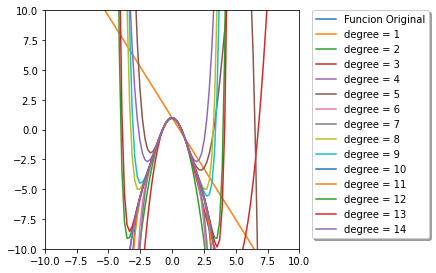

Polinomio de la iteración 0 :  
-1.708 x + 1
Polinomio de la iteración 1 :         2
-1.638 x - 4.441e-16 x + 0.9296
Polinomio de la iteración 2 :        3         2
0.272 x - 1.844 x - 0.136 x + 1
Polinomio de la iteración 3 :         4             3         2
0.2623 x - 5.551e-17 x - 1.968 x - 4.025e-16 x + 0.9976
Polinomio de la iteración 4 :           5          4           3         2
-0.03848 x + 0.2914 x + 0.03848 x - 1.992 x - 0.007215 x + 1
Polinomio de la iteración 5 :           6             5          4             3         2
-0.03777 x + 5.579e-15 x + 0.3286 x - 5.655e-15 x - 1.999 x + 7.991e-16 x + 1
Polinomio de la iteración 6 :           7           6            5          4            3     2
0.002839 x - 0.03991 x - 0.004258 x + 0.3315 x + 0.001774 x - 2 x - 0.0001774 x + 1
Polinomio de la iteración 7 :           8             7           6            5          4
0.002807 x - 6.246e-15 x - 0.04409 x + 1.19e-14 x + 0.3332 x
              3     2
 - 7.248e-15 x - 2 x 

In [307]:
TOL = [10e-8, 10e-16, 10e-32, 10e-56]
configuracionEpPr(TOL)

polinomios = taylor(a_fx, 1, -10, 10)

for i, p in enumerate(polinomios):
    print("Polinomio de la iteración " + str(i) + " : \n" + str(p))